In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect("traffic.db")
cursor = con.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('events',)]


# understanding the data

In [2]:
# Display columns
print('\nColumns in Events table:')
data=cursor.execute('''SELECT * FROM events''')
for column in data.description:
    print(column[0])


Columns in Events table:
event
date
country
city
artist
album
track
isrc
linkid


In [3]:
events_table = pd.read_sql_query("SELECT * FROM events", con)


In [4]:
events_table.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
events_table.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [6]:
events_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [7]:
#checking for nan values
events_table.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [8]:
# Display data
print('\nData in Events table:')
data=cursor.execute('''SELECT * FROM events limit 5''')
for row in data:
    print(row)


Data in Events table:
('click', '2021-08-21', 'Saudi Arabia', 'Jeddah', 'Tesher', 'Jalebi Baby', 'Jalebi Baby', 'QZNWQ2070741', '2d896d31-97b6-4869-967b-1c5fb9cd4bb8')
('click', '2021-08-21', 'Saudi Arabia', 'Jeddah', 'Tesher', 'Jalebi Baby', 'Jalebi Baby', 'QZNWQ2070741', '2d896d31-97b6-4869-967b-1c5fb9cd4bb8')
('click', '2021-08-21', 'India', 'Ludhiana', 'Reyanna Maria', 'So Pretty', 'So Pretty', 'USUM72100871', '23199824-9cf5-4b98-942a-34965c3b0cc2')
('click', '2021-08-21', 'France', 'Unknown', 'Simone & Simaria, Sebastian Yatra', 'No Llores Más', 'No Llores Más', 'BRUM72003904', '35573248-4e49-47c7-af80-08a960fa74cd')
('click', '2021-08-21', 'Maldives', 'Malé', 'Tesher', 'Jalebi Baby', 'Jalebi Baby', 'QZNWQ2070741', '2d896d31-97b6-4869-967b-1c5fb9cd4bb8')


C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


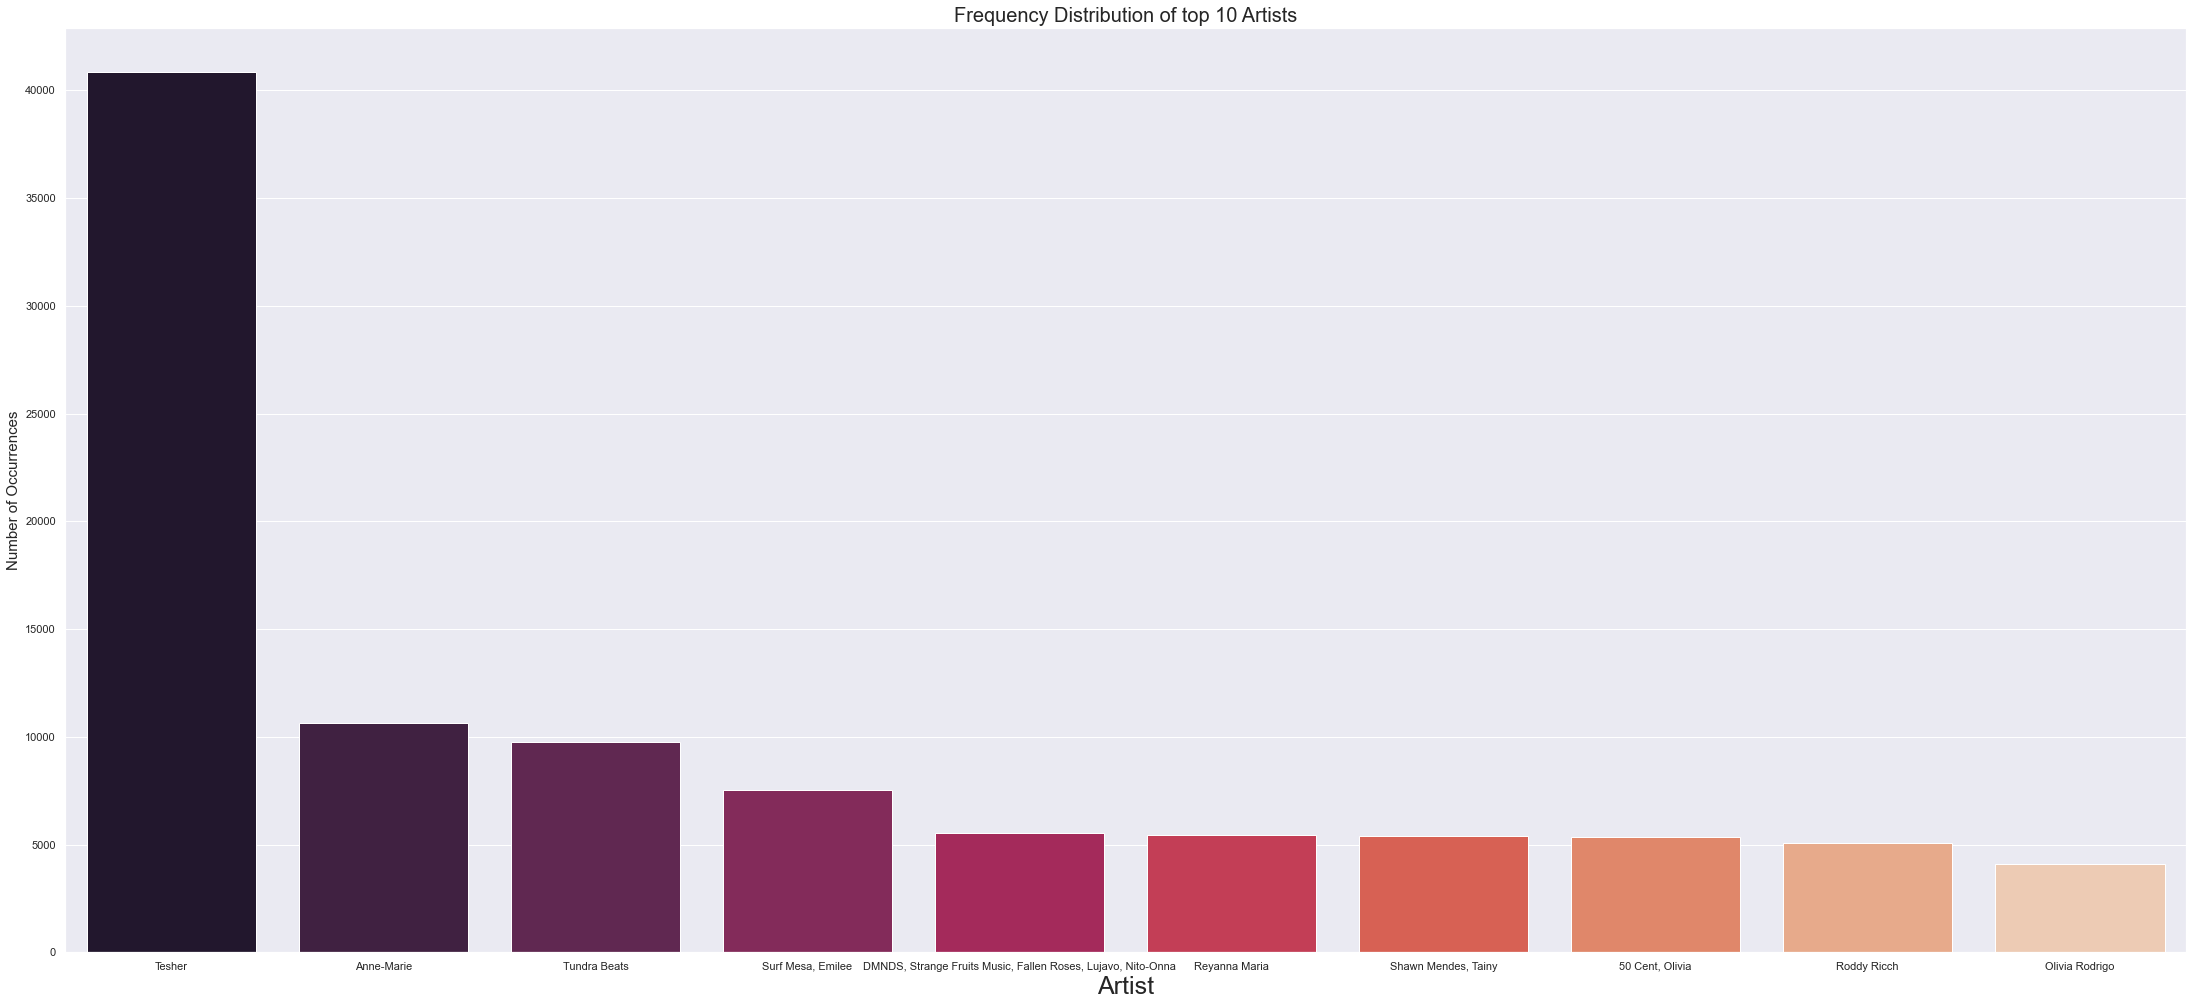

In [9]:
artist_count1 = events_table['artist'].value_counts()
artist_count = artist_count1.head(10)
plt.figure(figsize=(38,17))
sns.set(style="darkgrid")
sns.barplot(artist_count.index, artist_count.values, palette="rocket")
plt.title('Frequency Distribution of top 10 Artists',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Artist', fontsize=25)
plt.show()

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


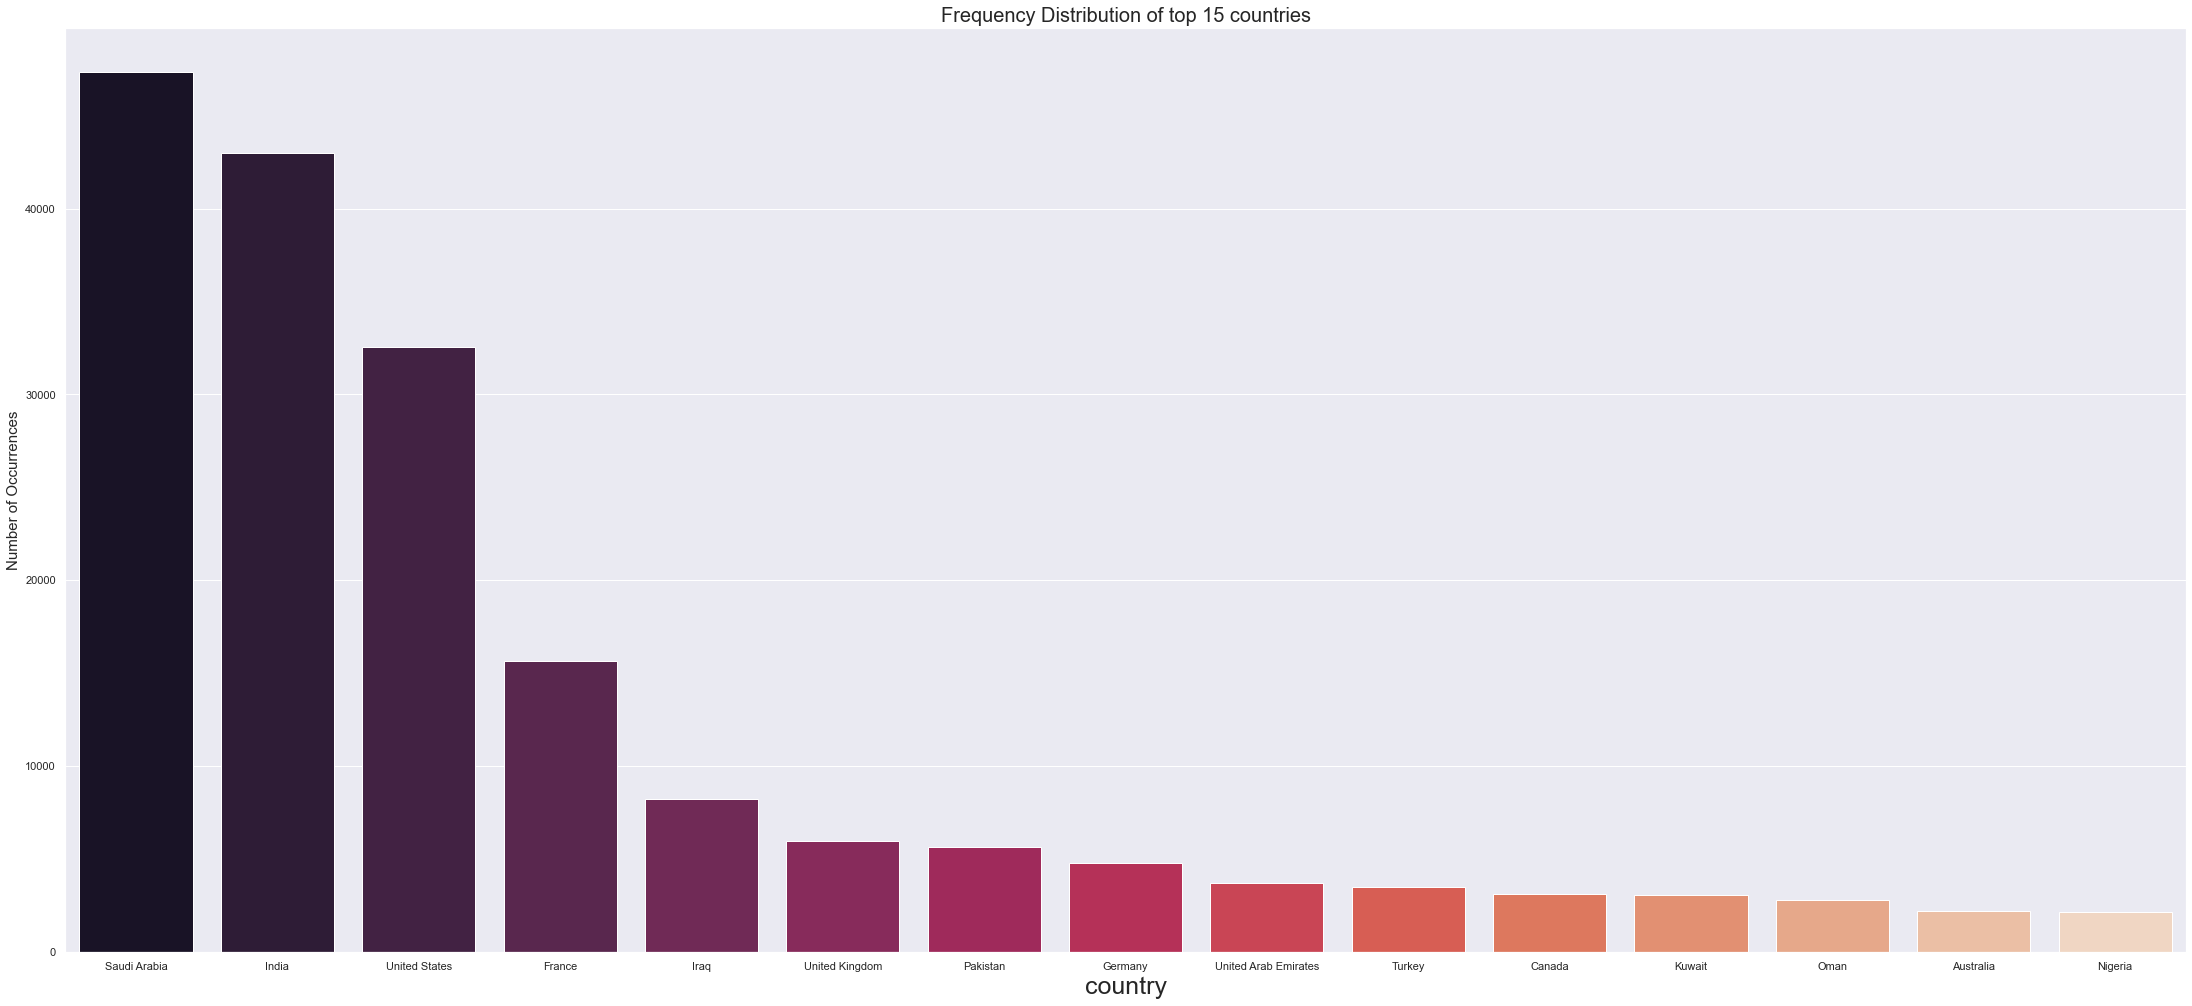

In [10]:
country_count1 = events_table['country'].value_counts()
country_count = country_count1.head(15)
plt.figure(figsize=(38,17))
sns.set(style="darkgrid")
sns.barplot(country_count.index, country_count.values, palette="rocket")
plt.title('Frequency Distribution of top 15 countries',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('country', fontsize=25)
plt.show()

C:\Users\Sushree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


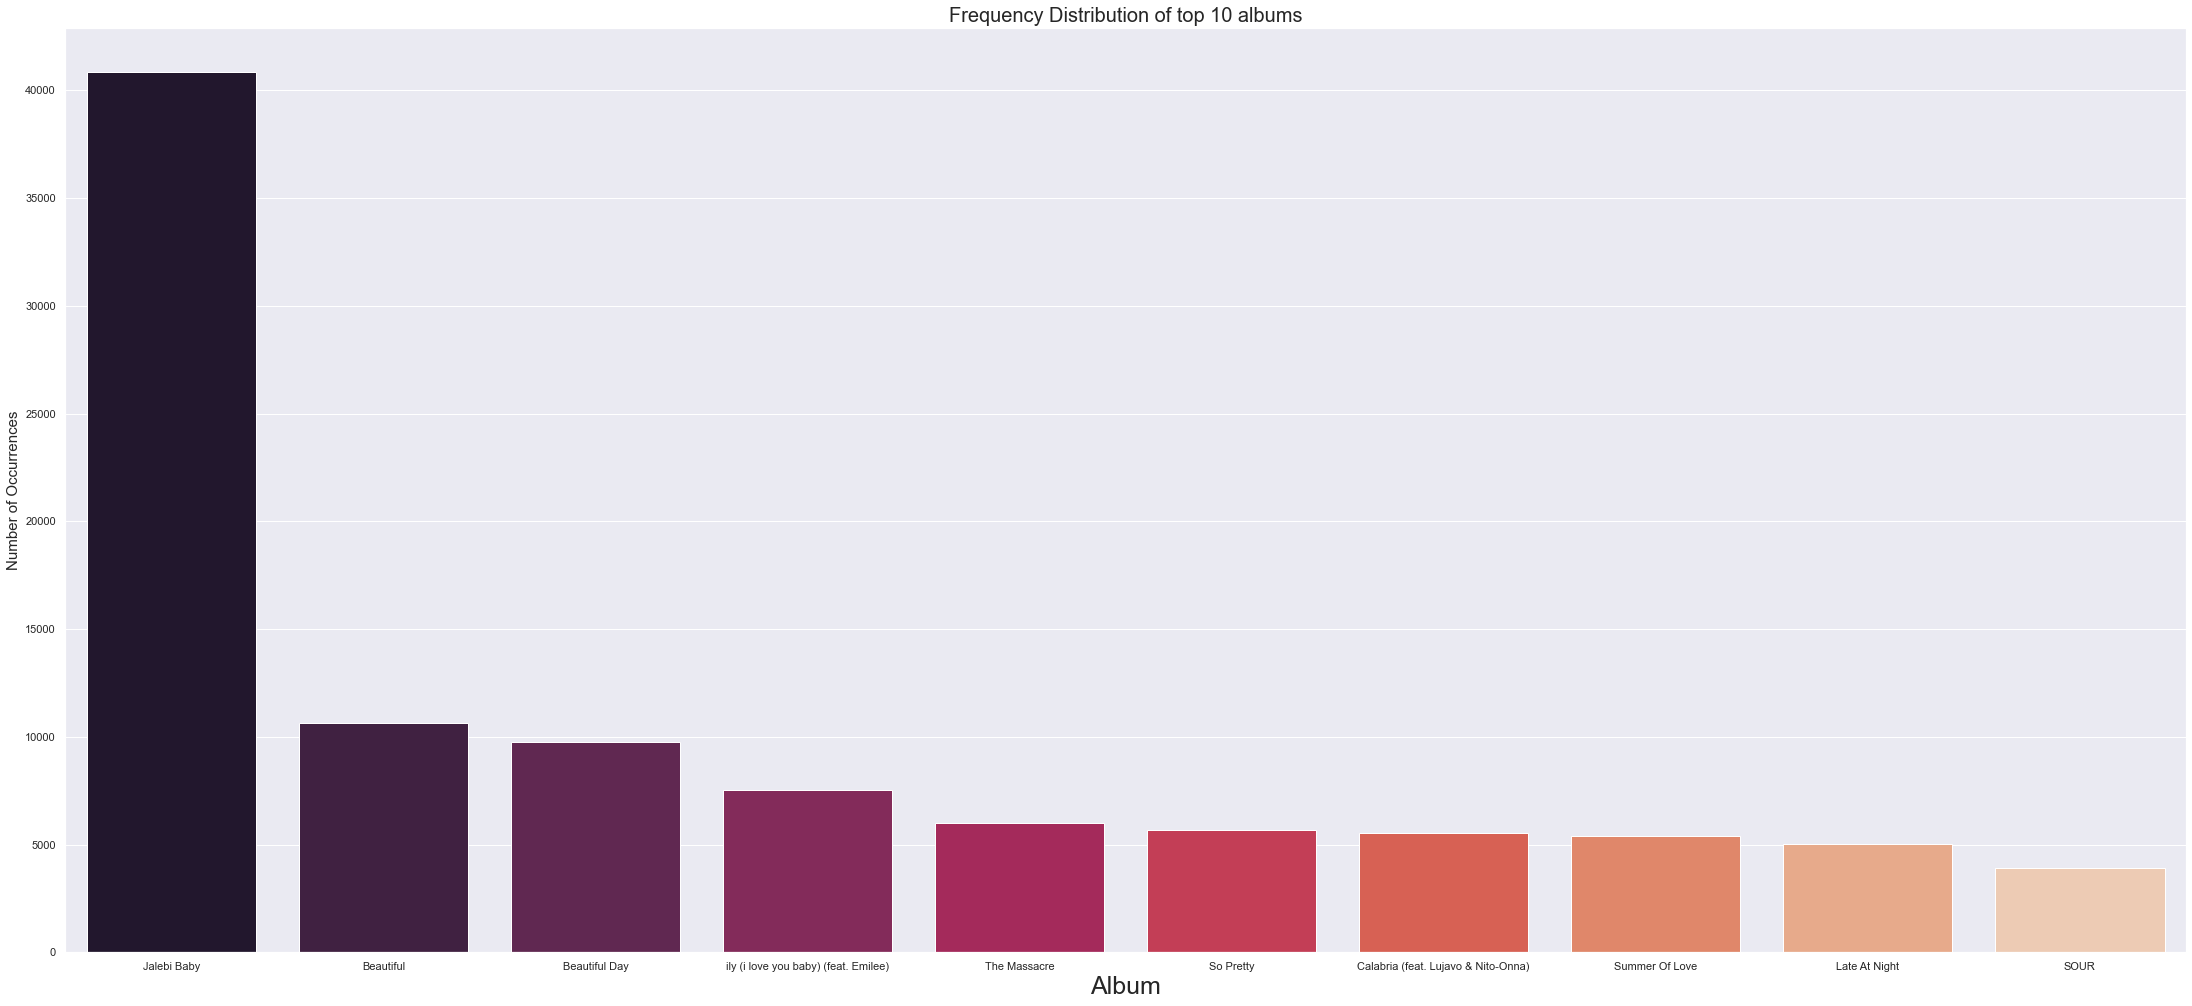

In [11]:
album_count1 = events_table['album'].value_counts()
album_count = album_count1.head(10)
plt.figure(figsize=(38,17))
sns.set(style="darkgrid")
sns.barplot(album_count.index, album_count.values, palette="rocket")
plt.title('Frequency Distribution of top 10 albums',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Album', fontsize=25)
plt.show()

# Task

How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [12]:
total_pageview = pd.read_sql_query("select event, date, count(event), (select count(event)from events where event = 'pageview')total_events from events where event = 'pageview' group by event,date",con)
total_pageview

,event,date,count(event),total_events
0,pageview,2021-08-19,22366,142015
1,pageview,2021-08-20,21382,142015
2,pageview,2021-08-21,21349,142015
3,pageview,2021-08-22,20430,142015
4,pageview,2021-08-23,18646,142015
5,pageview,2021-08-24,18693,142015
6,pageview,2021-08-25,19149,142015


What about the other recorded events?

In [13]:
total_click = pd.read_sql_query("select event, date, count(event), (select count(event)from events where event = 'click')total_events from events where event = 'click' group by event,date",con)
total_click

,event,date,count(event),total_events
0,click,2021-08-19,9207,55732
1,click,2021-08-20,8508,55732
2,click,2021-08-21,8071,55732
3,click,2021-08-22,7854,55732
4,click,2021-08-23,7315,55732
5,click,2021-08-24,7301,55732
6,click,2021-08-25,7476,55732


In [14]:
total_preview = pd.read_sql_query("select event, date, count(event), (select count(event)from events where event = 'preview')total_events from events where event = 'preview' group by event,date",con)
total_preview

,event,date,count(event),total_events
0,preview,2021-08-19,3788,28531
1,preview,2021-08-20,4222,28531
2,preview,2021-08-21,4663,28531
3,preview,2021-08-22,4349,28531
4,preview,2021-08-23,3847,28531
5,preview,2021-08-24,3840,28531
6,preview,2021-08-25,3822,28531


Which countries did the pageviews come from?

In [15]:
countries_pageviews = pd.read_sql_query("select count(event), country from events where event ='pageview' group by country order by count(event) desc",con)
print(countries_pageviews)

     count(event)                   country
0           28873              Saudi Arabia
1           27286                     India
2           20839             United States
3            9674                    France
4            4897                      Iraq
..            ...                       ...
207             1    Principality of Monaco
208             1                   Lesotho
209             1             Guinea-Bissau
210             1                  Guernsey
211             1  Central African Republic

[212 rows x 2 columns]


In [16]:
countries_click = pd.read_sql_query("select count(event), country from events where event ='click' group by country order by count(event) desc",con)
print(countries_click)

     count(event)                   country
0           11609                     India
1            9533             United States
2            9495              Saudi Arabia
3            4054                    France
4            1836                      Iraq
..            ...                       ...
198             1                  Dominica
199             1  Central African Republic
200             1       Antigua and Barbuda
201             1            American Samoa
202             1                      None

[203 rows x 2 columns]


In [17]:
countries_preview = pd.read_sql_query("select count(event),country from events where event ='preview' group by country order by count(event) desc",con)
print(countries_preview)

     count(event)                 country
0            8966            Saudi Arabia
1            4097                   India
2            2186           United States
3            1933                  France
4            1527                    Iraq
..            ...                     ...
179             1  British Virgin Islands
180             1                  Belize
181             1                   Aruba
182             1                 Andorra
183             1                    None

[184 rows x 2 columns]


What was the overall click rate (clicks/pageviews)?

In [18]:
click_rate = pd.read_sql_query("select event, count(*)*100 /sum(count(*))over() overall_count from events group by event",con)
print(click_rate)

      event  overall_count
0     click             24
1  pageview             62
2   preview             12


In [20]:
clickrate = pd.read_sql_query("SELECT SUM(CAST(A.click as FLOAT64)) / sum(CAST(B.pageview AS FLOAT64))FROM (SELECT linkid, COUNT(1) click FROM events WHERE event ='click' GROUP BY linkid) A INNER JOIN (SELECT linkid, COUNT(1) pageview FROM events WHERE event ='pageview' GROUP BY linkid) B ON A.linkid = B.linkid", con)
print(clickrate)

   SUM(CAST(A.click as FLOAT64)) / sum(CAST(B.pageview AS FLOAT64))
0                                           0.397972               


How does the clickrate distribute across different links?

In [21]:
overall = pd.read_sql_query("SELECT event, linkid,count(linkid) link_count from events where event In ('click','pageview')GROUP by linkid ORDER by link_count desc",con)
print(overall)

         event                                linkid  link_count
0        click  2d896d31-97b6-4869-967b-1c5fb9cd4bb8       34867
1        click  522da5cc-8177-4140-97a7-a84fdb4caf1c        8709
2        click  e849515b-929d-44c8-a505-e7622f1827e9        8179
3        click  c2c876ab-b093-4750-9449-6b4913da6af3        5732
4        click  681d888a-59ce-4acb-b7c5-95dab0c063d9        4854
...        ...                                   ...         ...
3834  pageview  0062d109-f6f4-5637-8731-8ce38362c113           1
3835  pageview  0038ff20-1ef7-5846-9f1a-4012fdf24da7           1
3836  pageview  0034d6cf-3bd8-5ffe-aafc-b3959fc48608           1
3837  pageview  0033934b-5d16-5a06-af58-d087bcdd3680           1
3838  pageview  0018cfff-50a1-5984-9715-01ef2d11a49a           1

[3839 rows x 3 columns]


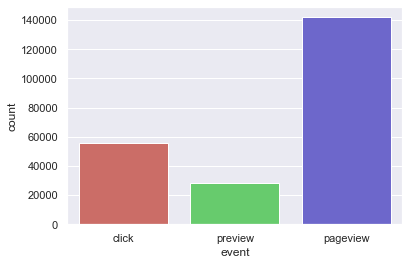

In [22]:

sns.countplot(x='event',data=events_table, palette='hls')
plt.show();

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
events_table['event'] = ord_enc.fit_transform(events_table[["event"]])

In [24]:
events_table['date'] = pd.to_datetime(events_table['date'], format='%Y-%m-%d')

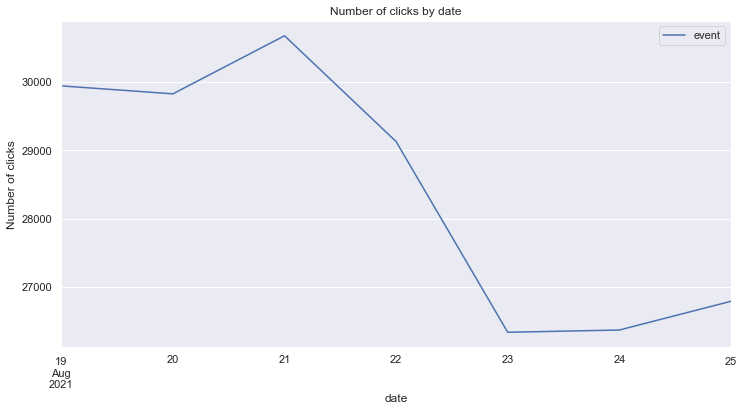

In [25]:
events_table.groupby('date').agg({'event':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by date');

In [26]:
X = events_table.drop(['isrc','track','city'], axis=1)

y = events_table['event']

In [27]:
events_table = events_table[events_table['country'].notnull()]
events_table = events_table[events_table['artist'].notnull()]
events_table = events_table[events_table['album'].notnull()]


In [28]:
events_table.event.value_counts()

1.0    141980
0.0     55720
2.0     28530
Name: event, dtype: int64

In [29]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
#representation of categorical variables as binary vectors
# Create the encoder.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [31]:
#oversampling of the imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

print('before Oversampling:',Counter(y_train))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print('After Oversampling:',Counter(y_train))

before Oversampling: Counter({1.0: 94981, 0.0: 37418, 2.0: 19207})
After Oversampling: Counter({1.0: 94981, 2.0: 94981, 0.0: 94981})


In [32]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

# Create an instance of the model. 
logreg = LogisticRegression() 

# Training the model. 
logreg.fit(X_train,y_train)

# Do prediction. 
y_pred_reg=logreg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_reg)))

Model accuracy score : 1.0000


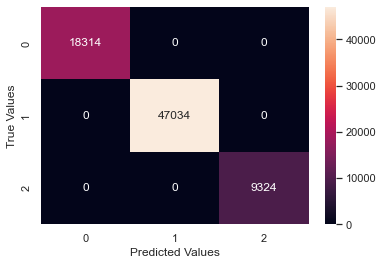

In [35]:
cm = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

categorical correlation between clicks and previews on a link

In [36]:
events_table1 = pd.read_sql_query("SELECT * FROM events", con)

In [37]:
events_table1.head()


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [38]:
events_table1.drop(events_table1.index[events_table1['event'] == 'pageview'], inplace=True)

In [39]:
events_table1.event.value_counts()

click      55732
preview    28531
Name: event, dtype: int64

In [40]:
data_crosstab = pd.crosstab(events_table1['linkid'],
                            events_table1['event'], 
                               margins = True,  margins_name="Total")

In [41]:
print("Contingency Table showing correlation between event and linkid")
data_crosstab

Contingency Table showing correlation between event and linkid


event,click,preview,Total
linkid,,,
00126b32-0c35-507b-981c-02c80d2aa8e7,2,0,2
004b9724-abca-5481-b6e9-6148a7ca00a5,1,0,1
0063a982-41cd-5629-96d0-e1c4dd72ea11,2,0,2
006af6a0-1f0d-4b0c-93bf-756af9071c06,8,11,19
00759b81-3f04-4a61-b934-f8fb3185f4a0,3,1,4
...,...,...,...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,0,1
fff84c0e-90a1-59d8-9997-adc909d50e16,1,0,1
fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,0,1


Chi-square test

#H₀: whether link and event (click, pageview) are independent, i.e. no relationship

#H₁: whether link and event (click, pageview) are dependent, i.e. there is relationship

In [42]:
import scipy.stats as stats
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = events_table1['linkid'].unique()
columns = events_table1['event'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)


The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4575.328439792997  and p value is: 0.0
Null Hypothesis is rejected.


Conclusion: The above calculation gives the evidence that there is an association between link and event, at 5% significance level.
